<a href="https://colab.research.google.com/github/Abhinay025/DS_BeginnerProjects/blob/main/Recognizing_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#Shape of the dataset
digits.data.shape

(1797, 64)

The images of the handwritten digits are contained in a digits.images array. Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15

In [ ]:
#Images stored in the form of array
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

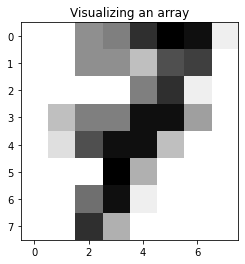

In [ ]:
#Visualizing an array
import matplotlib.pyplot as plt
plt.imshow(digits.images[7], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Visualizing an array')   
plt.savefig('plot2.png', dpi=100, bbox_inches='tight')

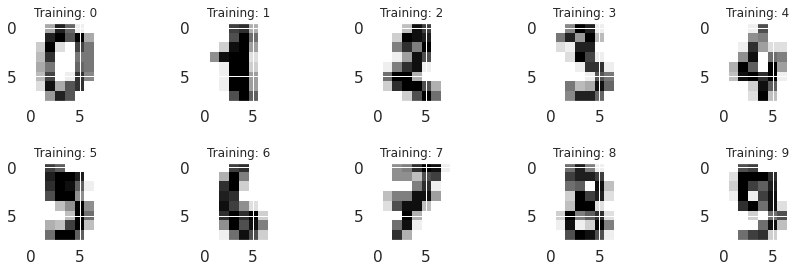

In [ ]:
import numpy as np 
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize =12)
    
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

In [ ]:
#Flatten the input images
n = len(digits.images)
print(n)
data = digits.images.reshape((n, -1))

1797


In [ ]:
#Working out the Dataset
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [ ]:
#case 1: We split the data by assigning 0.01 as test size.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

In [ ]:
#SV Classifier
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

In [ ]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


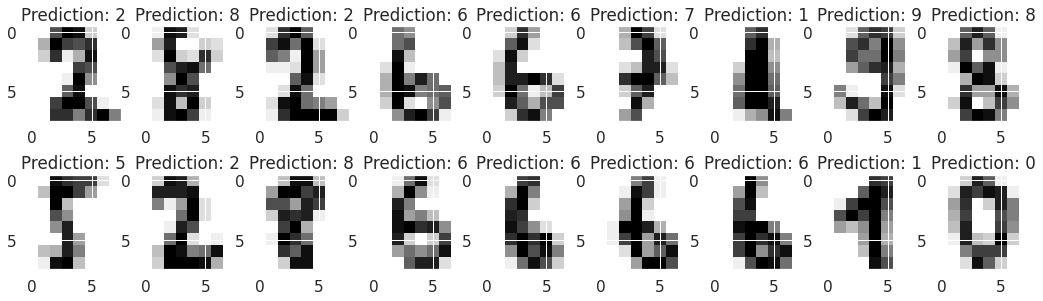

In [ ]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

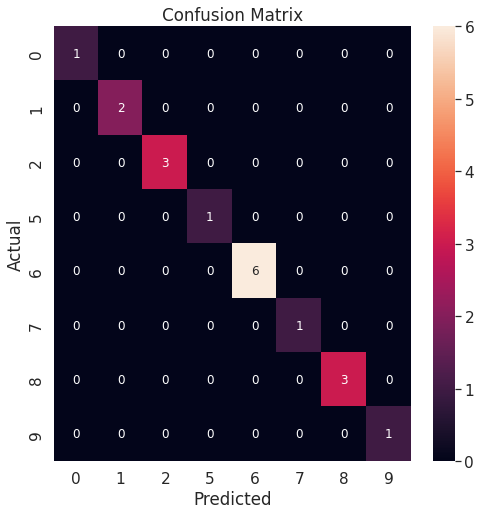

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [ ]:
#case 2: We split the data by assigning 0.7 as test size.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.7, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9841017488076311


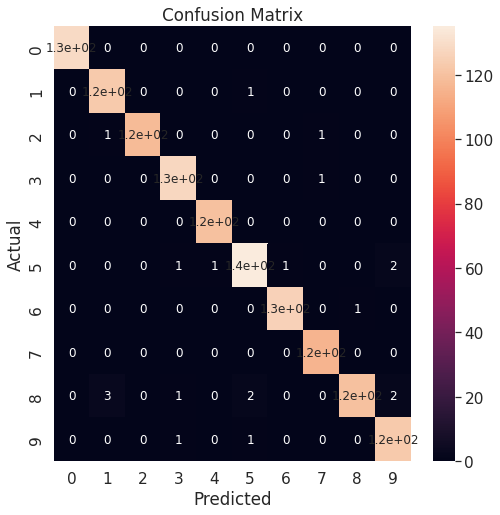

In [ ]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

In [ ]:
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.97      0.99      0.98       124
           2       1.00      0.98      0.99       120
           3       0.98      0.99      0.98       129
           4       0.99      1.00      1.00       120
           5       0.97      0.96      0.97       140
           6       0.99      0.99      0.99       127
           7       0.98      1.00      0.99       116
           8       0.99      0.94      0.96       128
           9       0.97      0.98      0.98       125

    accuracy                           0.98      1258
   macro avg       0.98      0.98      0.98      1258
weighted avg       0.98      0.98      0.98      1258



In [ ]:
#case 3: We split the data by assigning 0.9 as test size.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9684796044499382


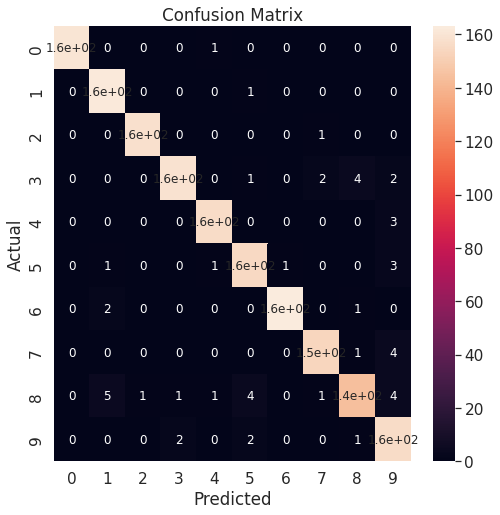

In [ ]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

In [ ]:
cr=classification_report(y_test, y_pred)
print("Classification report for SVM classifier:\n\n",cr)

Classification report for SVM classifier:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.95      0.99      0.97       163
           2       0.99      0.99      0.99       159
           3       0.98      0.95      0.96       168
           4       0.98      0.98      0.98       159
           5       0.95      0.96      0.96       161
           6       0.99      0.98      0.99       166
           7       0.97      0.97      0.97       159
           8       0.95      0.89      0.92       161
           9       0.91      0.97      0.94       161

    accuracy                           0.97      1618
   macro avg       0.97      0.97      0.97      1618
weighted avg       0.97      0.97      0.97      1618

